## ***DIPLOMADO EN CIENCIA DE DATOS APLICADOS AL DESARROLLO INTEGRAL DEL TALENTO HUMANOX***  

### ***M4: Análisis Predictivo para la Toma de Decisiones Estratégicas en RRHH***  

### ***<span style="color:#FF0000">Universidad del Rosario</span>***


# 📘 Notebook 1 – Fundamentos del Análisis Predictivo en RRHH

En este notebook trabajaremos con un dataset de Recursos Humanos adaptado con variables que representan atributos de los colaboradores en una organización.  

Este será nuestro punto de partida para aprender a **explorar, limpiar y preparar datos** con miras a usarlos en modelos predictivos.

## 📂 Estructura del Dataset

El dataset contiene información de colaboradores descrita con las siguientes variables:

- **Años de experiencia**: tiempo acumulado en el mercado laboral.  
- **Formación continua**: nivel de educación y capacitación permanente.  
- **Competencias técnicas**: habilidades asociadas al desempeño profesional específico.  
- **Competencias blandas**: habilidades sociales, comunicativas y de liderazgo.  
- **Perfil de talento**: clasificación del empleado (ej. *Innovador*, otros perfiles).  

## 🎯 Objetivos del Notebook
- Realizar un análisis exploratorio (EDA) de las variables de talento humano.  
- Identificar patrones y distribuciones en los datos.  
- Preparar el dataset para modelado predictivo (limpieza, codificación, escalado).  

## 🛠️ Herramientas a utilizar
- **pandas** y **numpy**: manipulación de datos.  
- **matplotlib** y **seaborn**: visualización exploratoria.  

➡️ Al finalizar este notebook, tendrás un **dataset limpio y analizado**, listo para ser utilizado en la construcción de modelos de predicción de perfiles de talento.



### ***Conocimiento del problema y de los datos.***


La parte más importante del machine learning es comprender los datos con los que estamos trabajando y cómo se relacionan con la tarea que desea realizar. No será efectivo elegir aleatoriamente un algoritmo y arrojarle los datos. Es necesario comprender lo que está sucediendo en el dataset antes de comenzar a
construir un modelo. Cada algoritmo es diferente en términos de qué tipo de datos y la configuración del problema para la que funciona mejor. 

Mientras se crea una solución de machine learning se debe tener en cuenta:

- ¿Qué pregunta(s) se está tratando de responder? ¿Creo que los datos recopilados pueden responder esa pregunta?

- ¿Cuál es la mejor manera de formular mis preguntas como un problema de machine learning?

- ¿He recopilado suficientes datos para representar el problema que quiero resolver?

- ¿Qué características de los datos extraje y permitirán las predicciones?

- ¿Cómo mediré el éxito de mi solución?

- ¿Cómo interactuará la solución de machine learning con otras partes de mi investigación o producto comercial?

In [ ]:
# Instalación de librerías necesarias
# 
# En esta celda instalamos las principales librerías que usaremos a lo largo del notebook:
# - pandas: para manipulación y análisis de datos.
# - numpy: para operaciones numéricas y manejo de arreglos.
# - matplotlib: para visualizaciones básicas.
# - seaborn: para visualizaciones estadísticas más estilizadas.
# - scikit-learn: para construir y evaluar modelos de machine learning.
#
# Esta celda solo necesita ejecutarse una vez (o cuando el entorno no tenga estas librerías instaladas).

!pip install pandas numpy matplotlib seaborn scikit-learn

In [12]:
import pandas as pd
# create a simple dataset of people
data = {'Name': ["John", "Anna", "Peter", "Linda"],'Location' : ["New York", "Paris", "Berlin", "London"],
        'Age' : [24, 13, 53, 33],}

data_pandas = pd.DataFrame(data)
display(data_pandas)

,Name,Location,Age
0,John,New York,24
1,Anna,Paris,13
2,Peter,Berlin,53
3,Linda,London,33


In [13]:
# Seleccionamos todos los registros con "Age" mayor a 30.
display(data_pandas[data_pandas["Age"] > 30])

,Name,Location,Age
2,Peter,Berlin,53
3,Linda,London,33


In [27]:
# Manipulación y análisis de datos
import pandas as pd
import numpy as np

# Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns

# Modelado predictivo
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


## ***Primera aplicación: clasificación de perfiles de talento***

Vamos a abordar una primera aplicación de *machine learning* creando nuestro primer modelo.

Supongamos que el área de Recursos Humanos de una empresa está interesada en **distinguir los perfiles de talento** de sus colaboradores para diseñar estrategias de formación y retención más efectivas.  

El área ha recopilado algunas características asociadas a cada empleado:  

- _Años de experiencia._  
- _Nivel de formación continua._  
- _Competencias técnicas._  
- _Competencias blandas._  

Estos valores han sido previamente medidos y normalizados en una escala numérica.

Además, se cuenta con la clasificación de cada empleado realizada por expertos en gestión humana, que identificaron perfiles de talento como:  

- _Innovador._  
- _Ejecutor._  
- _Tradicionalista._    

Supongamos que estos son los perfiles más representativos en la organización.

***Objetivo:*** Construir un modelo de *machine learning* que pueda aprender de las características de los empleados con perfil ya identificado, de modo que podamos **predecir el perfil de talento** de un nuevo colaborador a partir de sus competencias y experiencia.


In [19]:

# 📥 Cargar el dataset de Recursos Humanos

# Definimos la URL donde se encuentra almacenado el archivo CSV.
# En este caso, el dataset está publicado en un repositorio de GitHub.
url = "https://raw.githubusercontent.com/LeStark/Cursos/refs/heads/main/iris_human_resources.csv"

# Leemos el archivo CSV y lo cargamos en un DataFrame de pandas.
# El parámetro sep="," indica que el separador de columnas es la coma.
df = pd.read_csv(url, sep=",")

# Inspección inicial del dataset

# Obtenemos información general del DataFrame:
# - número de filas y columnas
# - nombre y tipo de cada columna
# - conteo de valores no nulos
# Esto nos da una idea de la calidad y estructura del dataset.
df.info()

# Mostramos las primeras filas para verificar que los datos se cargaron correctamente.
df.head()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Años de experiencia    150 non-null    float64
 1   Formación continua     150 non-null    float64
 2   Competencias técnicas  150 non-null    float64
 3   Competencias blandas   150 non-null    float64
 4   Perfil de talento      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,Años de experiencia,Formación continua,Competencias técnicas,Competencias blandas,Perfil de talento
0,5.1,3.5,1.4,0.2,Innovador
1,4.9,3.0,1.4,0.2,Innovador
2,4.7,3.2,1.3,0.2,Innovador
3,4.6,3.1,1.5,0.2,Innovador
4,5.0,3.6,1.4,0.2,Innovador


In [ ]:
# Identificar las clases de la variable objetivo (target)

# La columna "Perfil de talento" es nuestra variable de salida o target,
# es decir, la categoría que queremos predecir con el modelo.
# Con el método .unique() obtenemos los valores distintos que existen en esa columna.

print("Target: {}".format(df['Perfil de talento'].unique()))


Target: ['Innovador' 'Ejecutor' 'Tradicionalista']


In [ ]:
# Revisar el tamaño del dataset

# La propiedad .shape de un DataFrame devuelve una tupla con:
# - Número de filas (registros de empleados).
# - Número de columnas (variables o características medidas).
#
# Usamos .format() para mostrar el resultado en un mensaje más claro.

print("Tamaño de la data: {}".format(df.shape))


Tamaño de la data: (150, 5)


## Análisis exploratorio inicial de los datos

Antes de construir nuestro modelo, es importante detenernos a **explorar los datos**.  
Esto nos permite responder preguntas como:  

- ¿La información disponible realmente contiene señales que nos ayuden a predecir el perfil de talento?  
- ¿Existen anomalías o valores inusuales en las mediciones?  
- ¿Hay variables que parecen más relevantes que otras?  

En el mundo real, los datos de Recursos Humanos suelen presentar **inconsistencias**: registros incompletos, escalas diferentes de medición o valores inesperados. Por ejemplo, un empleado con “0 años de experiencia” pero clasificado como *Ejecutor* podría ser un dato erróneo o reflejar una situación particular.  

Una de las mejores formas de iniciar esta exploración es **visualizando los datos**.  
Con pocas variables (como en nuestro caso: experiencia, formación continua, competencias técnicas y blandas), los **scatter plots** o diagramas de dispersión son una herramienta muy útil.  

👉 Ten en cuenta que estos gráficos muestran la relación entre pares de variables, pero no capturan todas las interacciones posibles al mismo tiempo. Aun así, son una excelente primera aproximación para detectar patrones y tendencias en los datos.


##  Resumen de métricas descriptivas

Una buena práctica es calcular estadísticas descriptivas que nos permitan entender la distribución de cada variable numérica.  

En este caso, construiremos una tabla con las siguientes métricas:  
- **Media** → valor promedio.  
- **Mediana** → valor central de la distribución.  
- **Moda** → valor más frecuente.  
- **Desviación estándar** → mide qué tan dispersos están los datos respecto a la media.  
- **Mínimo y Máximo** → valores extremos de cada variable.  
- **Percentil 25 y 75** → delimitan el rango intermedio donde se encuentra el 50% central de los datos.  

Estas métricas nos ayudarán a detectar patrones, posibles anomalías y la variabilidad de cada característica.


In [44]:
# Construir tabla de métricas descriptivas para las variables numéricas

# Seleccionamos solo columnas numéricas
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculamos las principales métricas
summary = pd.DataFrame({
    "Media": numeric_df.mean(),
    "Mediana": numeric_df.median(),
    "Moda": numeric_df.mode().iloc[0],
    "Desviación estándar": numeric_df.std(),
    "Mínimo": numeric_df.min(),
    "Máximo": numeric_df.max(),
    "Percentil 25": numeric_df.quantile(0.25),
    "Percentil 75": numeric_df.quantile(0.75)
})

# Mostrar tabla
summary


,Media,Mediana,Moda,Desviación estándar,Mínimo,Máximo,Percentil 25,Percentil 75
Años de experiencia,5.843333,5.80,5.0,0.828066,4.3,7.9,5.1,6.4
Formación continua,3.057333,3.00,3.0,0.435866,2.0,4.4,2.8,3.3
Competencias técnicas,3.758000,4.35,1.4,1.765298,1.0,6.9,1.6,5.1
Competencias blandas,1.199333,1.30,0.2,0.762238,0.1,2.5,0.3,1.8


##  Exploración inicial de características por perfil de talento

Antes de construir modelos de clasificación, es importante entender cómo se distribuyen las variables
en relación con los perfiles de talento.  
Dos visualizaciones útiles son:

- **Boxplots**: muestran la distribución de cada variable (mediana, cuartiles, valores atípicos) según el perfil.  
- **Gráficos de barras**: permiten comparar los valores medios de las características entre perfiles.

Estas gráficas nos ayudan a responder preguntas como:  
- ¿Los *Tradicionalistas* tienden a tener más años de experiencia que los *Innovadores*?  
- ¿Existen diferencias claras en competencias blandas entre los tres perfiles?


C:\Users\jlvar\AppData\Local\Temp\ipykernel_22784\1865674069.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Perfil de talento", data=df, palette="Set2")


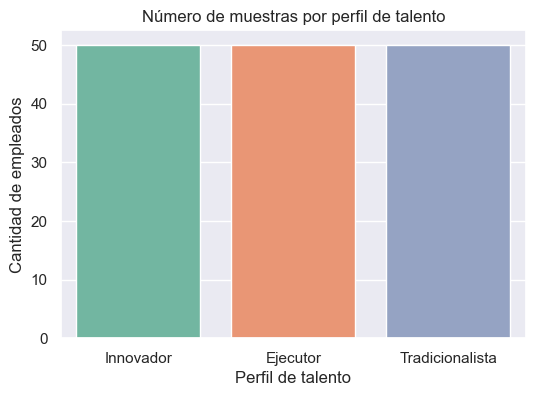

In [34]:
#  Conteo de empleados por perfil de talento
plt.figure(figsize=(6,4))
sns.countplot(x="Perfil de talento", data=df, palette="Set2")

plt.title("Número de muestras por perfil de talento")
plt.xlabel("Perfil de talento")
plt.ylabel("Cantidad de empleados")
plt.show()


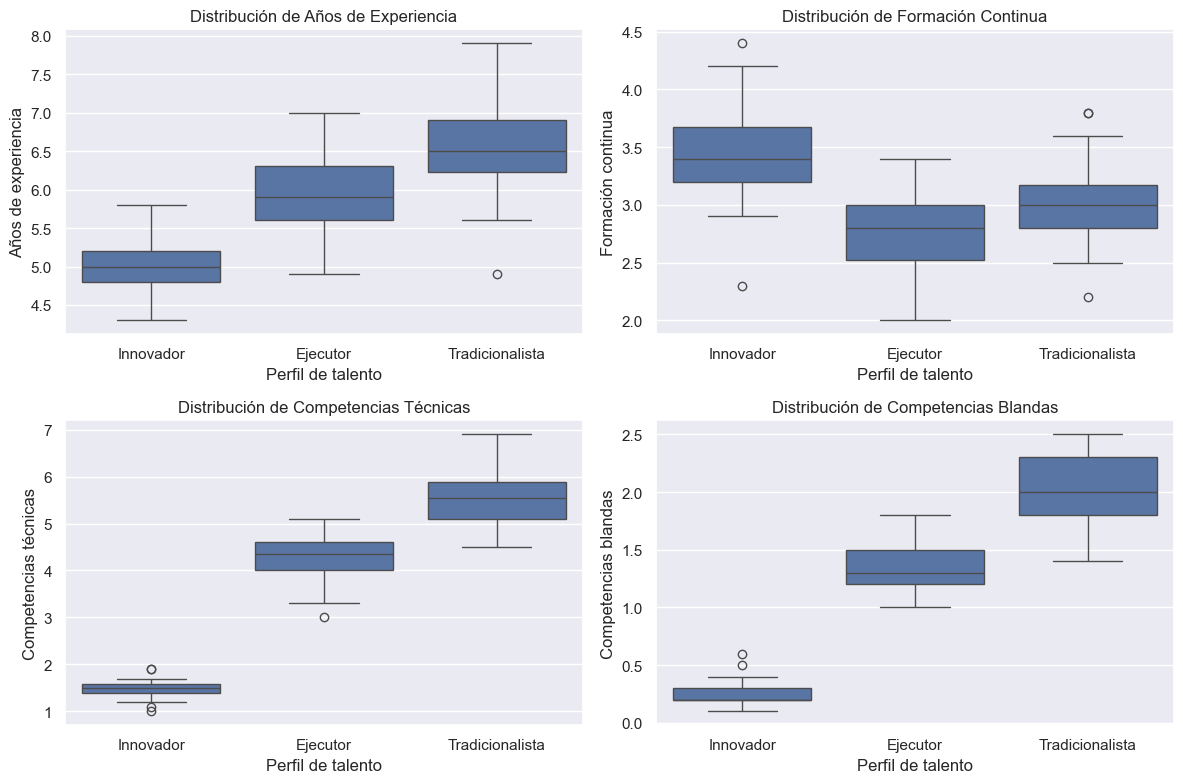

In [32]:
# Boxplots por perfil de talento
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

sns.boxplot(x="Perfil de talento", y="Años de experiencia", data=df, ax=axes[0,0])
axes[0,0].set_title("Distribución de Años de Experiencia")

sns.boxplot(x="Perfil de talento", y="Formación continua", data=df, ax=axes[0,1])
axes[0,1].set_title("Distribución de Formación Continua")

sns.boxplot(x="Perfil de talento", y="Competencias técnicas", data=df, ax=axes[1,0])
axes[1,0].set_title("Distribución de Competencias Técnicas")

sns.boxplot(x="Perfil de talento", y="Competencias blandas", data=df, ax=axes[1,1])
axes[1,1].set_title("Distribución de Competencias Blandas")

plt.tight_layout()
plt.show()


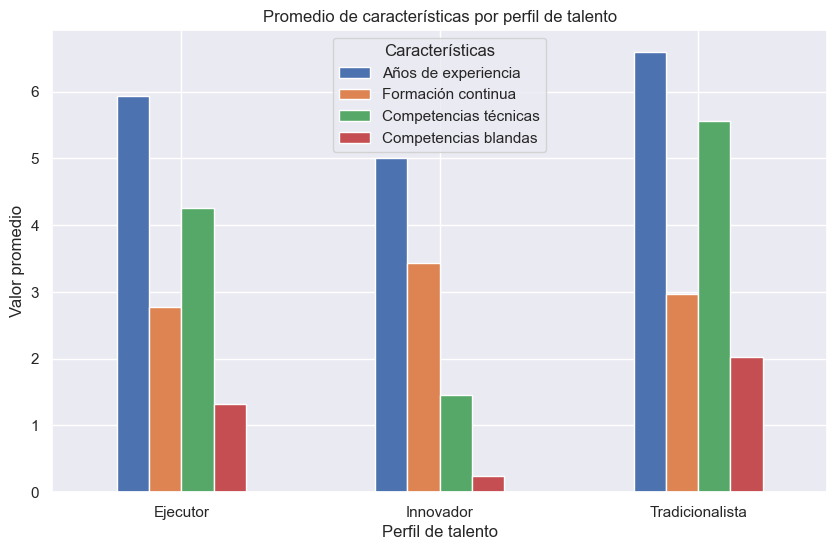

In [33]:
# Valores promedio de cada característica por perfil
mean_values = df.groupby("Perfil de talento").mean(numeric_only=True)

mean_values.plot(kind="bar", figsize=(10,6))
plt.title("Promedio de características por perfil de talento")
plt.ylabel("Valor promedio")
plt.xticks(rotation=0)
plt.legend(title="Características")
plt.show()


#### ***Análisis avanzado***

Construya un [`pairplot`](https://seaborn.pydata.org/generated/seaborn.pairplot.html) o un [`PairGrid`](https://seaborn.pydata.org/generated/seaborn.PairGrid.html) en donde:

- La **diagonal principal** muestre un histograma de cada variable numérica.  
- Los **gráficos fuera de la diagonal** sean *scatter plots* que comparen pares de variables.  
- Utilice el parámetro `hue` con la columna **Perfil de talento**, de manera que cada punto esté coloreado según el perfil (*Innovador, Ejecutor, Tradicionalista*).  

Este ejercicio permite identificar si algunos perfiles de talento tienden a agruparse en torno a ciertas características (ej. Innovadores con alta formación continua o Tradicionalistas con más años de experiencia).


***Respuesta:***

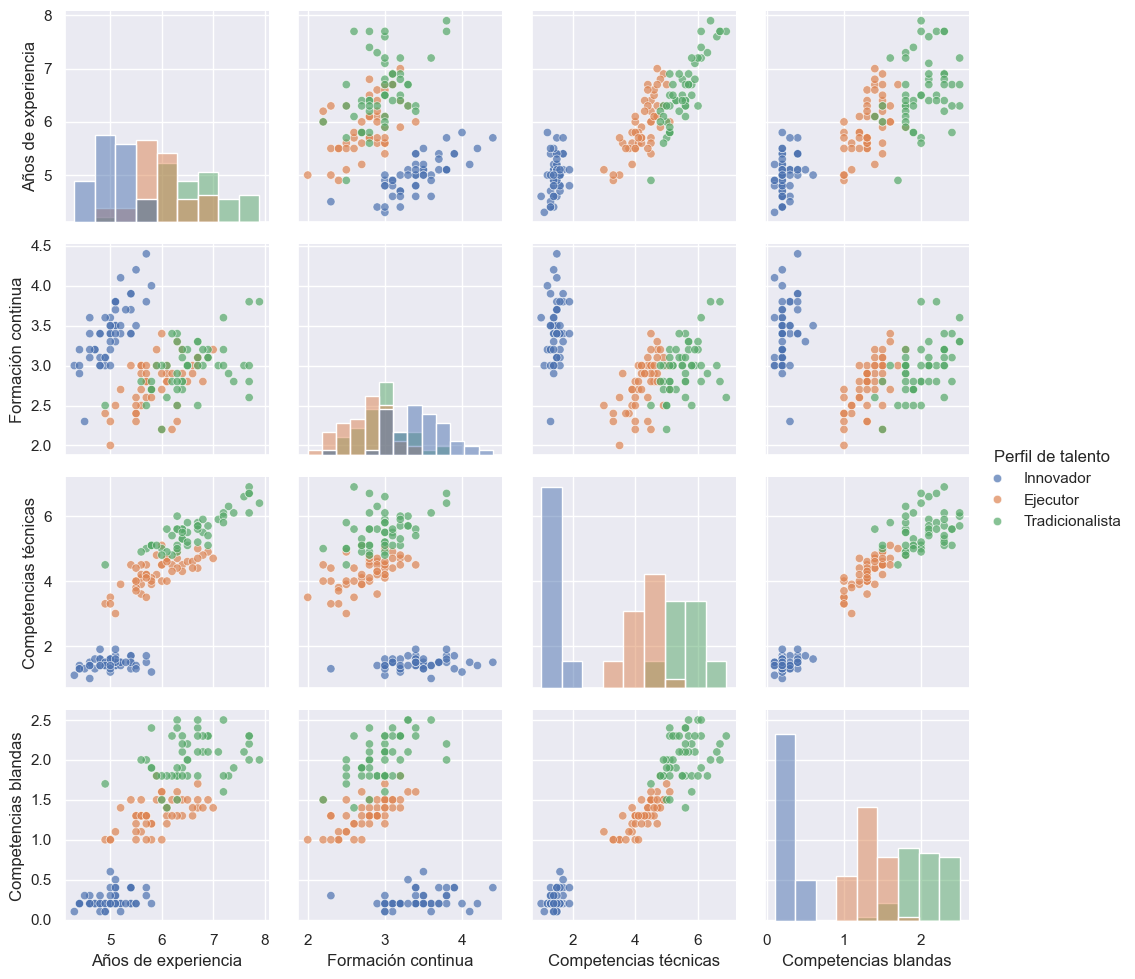

In [26]:
# 📊 Versión avanzada con PairGrid

g = sns.PairGrid(df, hue="Perfil de talento")
g.map_diag(sns.histplot, kde=False)  # Histogramas en la diagonal
g.map_offdiag(sns.scatterplot, alpha=0.7)  # Scatter plots fuera de la diagonal
g.add_legend()  # Agregar leyenda

plt.show()


De las gráficas podemos observar que los tres perfiles de talento (**Innovador, Ejecutor y Tradicionalista**) tienden a separarse en función de las variables analizadas.  

Por ejemplo:  
- Los **Innovadores** aparecen concentrados en niveles bajos de años de experiencia, competencias técnicas y blandas.  
- Los **Ejecutores** muestran valores intermedios tanto en competencias técnicas como en blandas.  
- Los **Tradicionalistas** tienden a ubicarse en los rangos más altos de años de experiencia y competencias.  

Esto sugiere que un modelo de aprendizaje automático podrá **aprender patrones claros** en los datos y distinguir entre los perfiles de talento a partir de las variables disponibles.


## Transformación de los datos

Antes de entrenar un modelo de *machine learning*, es necesario preparar los datos.  
En este caso, realizaremos dos pasos fundamentales:

### 1. Codificación de la variable objetivo (target)

La columna **Perfil de talento** contiene etiquetas de texto (*Innovador, Ejecutor, Tradicionalista*).  
Los algoritmos no pueden trabajar directamente con texto, por lo que debemos **convertir estas categorías en valores numéricos**.  
Para esto usamos `LabelEncoder`, que asigna un número entero a cada clase.  

Ejemplo:  
- Innovador → 0  
- Ejecutor → 1  
- Tradicionalista → 2  

*(El orden depende de cómo se encuentren en el dataset.)*

### 2. Normalización de las variables numéricas

Las variables de entrada (**Años de experiencia, Formación continua, Competencias técnicas, Competencias blandas**) tienen escalas diferentes.  
Si no las normalizamos, una variable con números grandes podría influir más en el modelo que otra con números pequeños.  

Usaremos `StandardScaler`, que transforma cada variable para que:  
- Tenga media = 0.  
- Tenga desviación estándar = 1.  

De esta forma, todas las características quedan en la **misma escala** y el modelo puede tratarlas de manera justa.

Con estos dos pasos tendremos un **dataset listo para la clasificación**, donde:  
- El target está representado en números.  
- Las variables de entrada están estandarizadas.


In [31]:
# Preparación de los datos para modelado

# 1. Separar features (X) y target (y)
X = df.drop("Perfil de talento", axis=1)   # Variables independientes
y = df["Perfil de talento"]               # Variable objetivo

# 2. Codificación de la variable target (Innovador, Ejecutor, Tradicionalista → 0,1,2)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

print("Clases originales:", label_encoder.classes_)

# Seleccionar 10 índices aleatorios sin repetición
indices = np.random.choice(len(y_encoded), size=10, replace=False)

# Mostrar las clases codificadas de esos 10 empleados
print("Clases codificadas (10 aleatorias):", y_encoded[indices])

# 3. Normalización/Estandarización de las features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Verificación de la transformación
print("\nPrimeras 5 filas de las variables normalizadas:")
print(X_scaled[:5])


Clases originales: ['Ejecutor' 'Innovador' 'Tradicionalista']
Clases codificadas (10 aleatorias): [1 2 2 0 1 0 1 0 2 0]

Primeras 5 filas de las variables normalizadas:
[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]


### ***Conjuntos de datos Training y Test***

Nuestro objetivo es construir un modelo de *machine learning* que pueda ***predecir*** el perfil de talento de un nuevo colaborador a partir de sus características (**años de experiencia, formación continua, competencias técnicas y blandas**).  

Para lograrlo, necesitamos entrenar un modelo y, además, comprobar si realmente funciona de manera confiable.  

No podemos evaluar el modelo con los mismos datos que usamos para entrenarlo.  
La razón es que el modelo podría “memorizar” los ejemplos que ya conoce y predecir siempre correctamente para esos casos, pero eso **no garantiza** que funcione igual de bien con datos nuevos.  

En otras palabras, queremos que el modelo no solo aprenda los datos actuales, sino que también **se generalice** a futuros colaboradores que no ha visto antes.  

La forma de resolver este problema es **dividir nuestro dataset en dos partes**:  
1. **Training data (datos de entrenamiento):** se usan para construir el modelo.  
2. **Test data (datos de prueba):** se usan para evaluar qué tan bien predice el modelo sobre ejemplos que nunca ha visto.  

En `scikit-learn` podemos hacer esta división con la función `train_test_split`.  
De manera estándar, se toma aproximadamente el **75% de los datos para entrenamiento** y el **25% para prueba**.  
Esta proporción suele ser una buena práctica porque deja suficiente información para entrenar el modelo, pero también una muestra representativa para evaluarlo.


In [36]:
# 📚 Dividir el dataset en Training y Test

from sklearn.model_selection import train_test_split

# X = variables predictoras (todas menos 'Perfil de talento')
# y_encoded = variable objetivo ya codificada (Innovador=0, Ejecutor=1, Tradicionalista=2)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,        # Datos normalizados (features)
    y_encoded,       # Target codificado
    test_size=0.25,  # 25% para prueba, 75% para entrenamiento
    random_state=42, # Semilla para reproducibilidad
    stratify=y_encoded, # Garantiza que las clases queden balanceadas en train y test
    shuffle=True      # Mezcla los datos antes de dividir
)

# Verificamos el tamaño de cada conjunto
print("Tamaño de X_train:", X_train.shape)
print("Tamaño de X_test:", X_test.shape)
print("Tamaño de y_train:", y_train.shape)
print("Tamaño de y_test:", y_test.shape)


Tamaño de X_train: (112, 4)
Tamaño de X_test: (38, 4)
Tamaño de y_train: (112,)
Tamaño de y_test: (38,)


### ***Construcción de nuestro primer modelo: [`k-Nearest Neighbors`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)***

El modelo **k-Nearest Neighbors (KNN)** es uno de los algoritmos de clasificación más sencillos de entender e implementar.  

La idea central es que **para clasificar un nuevo registro de datos (por ejemplo, un colaborador cuyo perfil de talento aún no conocemos), el algoritmo busca en el conjunto de entrenamiento los registros más similares** y asigna la clase predominante entre ellos.  

- Si usamos **k = 1**, el modelo buscará únicamente el vecino más cercano en el conjunto de entrenamiento y le asignará su mismo perfil de talento (*Innovador, Ejecutor o Tradicionalista*).  
- Si usamos un valor mayor de **k** (por ejemplo, 3 o 5), el algoritmo considerará a los 3 o 5 vecinos más cercanos, y clasificará el nuevo registro según la **clase mayoritaria** en ese grupo.  

De esta forma, KNN se basa completamente en la **proximidad**: los individuos que se parecen entre sí (según sus características: experiencia, formación, competencias) tienden a compartir la misma etiqueta de perfil.  

 En esta primera implementación, comenzaremos usando **k = 1** para ilustrar el funcionamiento básico del modelo. Más adelante exploraremos cómo elegir el valor de *k* de manera más adecuada.


In [50]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

El objeto `knn` encapsula el algoritmo que se usará para construir el modelo a partir de los datos en train, así como el algoritmo para hacer predicciones sobre nuevos puntos de datos. También contienen la información que el algoritmo ha extraído de los datos de entrenamiento. En el caso de KNeighborsClassifier, solo almacenará el conjunto de train.

In [51]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 3,
 'p': 2,
 'weights': 'uniform'}

Lo anterior nos muestra qué parámetros
se usarán para crear el modelo. Casi todos ellos son los valores predeterminados, note que tenemos `n_neighbors=1`, que es el parámetro que pasamos. La mayoría de los modelos en `scikit-learn` tiene muchos parámetros, pero la mayoría de ellos son optimizaciones de velocidad o para casos de uso muy especiales. Por ahora, no nos preocupamos por el otros parámetros mostrados. Recuerde que más adelante cubriremos toda la temática.

Para construir el modelo en el conjunto train, llamamos al método `fit()` que es el ajuste del objeto `knn`, que toma como argumentos el NumPy array `X_train` que contiene la data train y el NumPy array en `y_train` de las etiquetas de train correspondientes:

In [52]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

### ***Haciendo predicciones***

Una vez entrenado nuestro modelo, podemos usarlo para hacer predicciones sobre **nuevos colaboradores** cuyo perfil de talento aún no conocemos.  

Supongamos que llega un nuevo empleado con las siguientes características:

- **Años de experiencia:** 4  
- **Formación continua:** 3  
- **Competencias técnicas:** 2  
- **Competencias blandas:** 4  

👉 ¿A qué perfil de talento pertenecerá este colaborador? (*Innovador, Ejecutor o Tradicionalista*)  

Para que el modelo pueda procesar estos datos, debemos organizarlos en un **array de NumPy** con la forma adecuada:  
- Número de muestras = 1 (porque es un solo empleado nuevo).  
- Número de características = 4 (años de experiencia, formación continua, competencias técnicas y blandas).  

De esta manera, el modelo podrá recibir la información en el mismo formato con el que fue entrenado y generar la predicción correspondiente.

Recordemos las estadisticas desxcriptivas de los datos con que fue entrenado: 

## Tabla de métricas descriptivas

| Característica           | Media    | Mediana | Moda | Desviación estándar | Mínimo | Máximo | Percentil 25 | Percentil 75 |
|---------------------------|----------|---------|------|----------------------|--------|--------|--------------|--------------|
| **Años de experiencia**   | 5.843333 | 5.80    | 5.0  | 0.828066             | 4.3    | 7.9    | 5.1          | 6.4          |
| **Formación continua**    | 3.057333 | 3.00    | 3.0  | 0.435866             | 2.0    | 4.4    | 2.8          | 3.3          |
| **Competencias técnicas** | 3.758000 | 4.35    | 1.4  | 1.765298             | 1.0    | 6.9    | 1.6          | 5.1          |
| **Competencias blandas**  | 1.199333 | 1.30    | 0.2  | 0.762238             | 0.1    | 2.5    | 0.3          | 1.8          |




In [53]:
# Crear un nuevo registro para hacer una predicción

# Definimos un colaborador ficticio con sus características:
# - Años de experiencia = 5
# - Formación continua = 2.9
# - Competencias técnicas = 1
# - Competencias blandas = 0.2
#
# Importante: los valores deben estar en una lista dentro de otra lista [[...]]
# porque el modelo espera un array bidimensional:
#   - 1 fila  -> una sola muestra (un empleado nuevo)
#   - 4 columnas -> cuatro características

X_new = np.array([[5, 2.9, 1, 0.2]])

# Verificamos la forma del array: (n_muestras, n_features)
print("X_new.shape: {}".format(X_new.shape))


X_new.shape: (1, 4)


In [54]:
# Predicción con el modelo KNN asegurando la normalización del nuevo dato

# 1. Normalizamos el nuevo registro con el mismo scaler usado en el entrenamiento
X_new_scaled = scaler.transform(X_new)

# 2. Hacemos la predicción con el modelo entrenado
prediction = knn.predict(X_new_scaled)

# 3. Recuperamos el nombre de la etiqueta original usando el LabelEncoder
predicted_label = label_encoder.inverse_transform(prediction)

print("Predicción (codificada):", prediction)
print("Perfil de talento predicho:", predicted_label[0])


Predicción (codificada): [1]
Perfil de talento predicho: Innovador


c:\Users\jlvar\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Nuestro modelo predice que este nuevo colaborador pertenece a la **clase 1**, lo que significa que su perfil de talento es **Ejecutor**.  

Ahora bien, surge una pregunta clave:  
**¿Cómo sabemos si podemos confiar en nuestro modelo?**  

En este caso, no conocemos el perfil real de este colaborador (ese es precisamente el objetivo de construir el modelo: predecirlo).  
Por eso, para evaluar la confiabilidad del modelo debemos probarlo con datos donde **sí conocemos la etiqueta real**, es decir, con el conjunto de prueba (*test set*).  

De esta manera podemos comparar las predicciones del modelo con las etiquetas verdaderas y medir qué tan bien está funcionando.


### ***Evaluación del modelo***

¿Recuerda que tenemos un conjunto de **test**?  
Es aquí donde entra en juego.  

Sabemos que estos datos **no se usaron para construir el modelo**, pero sí conocemos el perfil de talento correcto para cada colaborador en este conjunto.  

Por lo tanto, podemos hacer una **predicción para cada empleado del test set** y compararla contra su etiqueta real (el perfil de talento conocido: *Innovador, Ejecutor o Tradicionalista*).  

De esta forma, podremos medir qué tan bien funciona el modelo.  
Una de las métricas más utilizadas es la **precisión (accuracy)**, que indica la proporción de colaboradores para los que el modelo hizo una predicción correcta.

In [55]:
y_pred = knn.predict(X_test)
print("Predicciones en el conjunto test:\n\n {}".format(y_pred))

Predicciones en el conjunto test:

 [0 1 1 1 0 1 2 2 2 2 0 2 1 1 0 0 0 1 0 1 2 1 2 1 2 1 0 2 0 1 2 2 2 0 0 0 2
 1]


Podemos usar el método `score()` del objeto knn, que calculará la puntuación con exactitud:


In [56]:
print("Score en el conjunto test: {:.2f}".format(knn.score(X_test, y_test)))

Score en el conjunto test: 0.95


Para este modelo, el `accuracy` en el conjunto test es de aproximadamente 0,97, lo que significa que hicimos un buen trabajo en la predicción para el 97% de los iris en el conjunto test. Bajo algunos supuestos matemáticos, esto significa que podemos esperar que nuestro modelo sea correcto el 97% del tiempo para nuevos
iris. Este alto nivel de precisión significa que nuestro
el modelo puede ser lo suficientemente confiable como para usarlo.

## ***Conclusiones y comentarios***

En este ejercicio realizamos una breve introducción al *machine learning* aplicado a **Recursos Humanos**, explorando cómo estas técnicas permiten apoyar la toma de decisiones estratégicas.  

Primero discutimos la diferencia entre **aprendizaje supervisado y no supervisado**, y revisamos las herramientas básicas que utilizamos en el curso.  

Luego abordamos el reto de construir un modelo capaz de **predecir el perfil de talento de un colaborador** a partir de sus características principales: años de experiencia, formación continua, competencias técnicas y competencias blandas.  

En este contexto trabajamos con un problema de **clasificación multiclase**, ya que el perfil de un empleado puede ser:  
- *Innovador*  
- *Ejecutor*  
- *Tradicionalista*  

Dividimos nuestro dataset en **conjunto de entrenamiento (train)** y **conjunto de prueba (test)**. Con los datos de entrenamiento construimos el modelo y con los de prueba evaluamos su desempeño, es decir, qué tan bien se generaliza a colaboradores que nunca había visto.  

El algoritmo seleccionado fue **k-Nearest Neighbors (KNN)**, el cual clasifica un nuevo colaborador considerando los perfiles de sus vecinos más cercanos en el conjunto de entrenamiento. Para esto:  
- Instanciamos la clase del modelo.  
- Ajustamos el modelo con `fit()` usando `X_train` y `y_train`.  
- Evaluamos su desempeño con `score()` sobre el conjunto `test`.  

El resultado obtenido fue una **precisión (accuracy) de aproximadamente 95%**, lo que significa que el modelo clasificó correctamente el perfil de talento en 95 de cada 100 casos del conjunto de prueba.  

Este resultado sugiere que el modelo tiene un **alto poder predictivo**, aunque siempre será importante complementarlo con validaciones adicionales y consideraciones éticas antes de usarlo en decisiones reales de gestión humana.


In [57]:
import ipywidgets as widgets
from ipywidgets import interact

def predecir_perfil(años_experiencia, formacion_continua, competencias_tecnicas, competencias_blandas):
    # Construimos el array con los valores ingresados
    X_user = np.array([[años_experiencia, formacion_continua, competencias_tecnicas, competencias_blandas]])
    X_user_scaled = scaler.transform(X_user)

    # Predicción
    prediction = knn.predict(X_user_scaled)
    predicted_label = label_encoder.inverse_transform(prediction)
    
    print("📊 Perfil de talento predicho:", predicted_label[0])

# Sliders interactivos
interact(
    predecir_perfil,
    años_experiencia=widgets.FloatSlider(min=0, max=10, step=0.1, value=3),
    formacion_continua=widgets.FloatSlider(min=0, max=5, step=0.1, value=2.5),
    competencias_tecnicas=widgets.FloatSlider(min=0, max=10, step=0.1, value=5),
    competencias_blandas=widgets.FloatSlider(min=0, max=5, step=0.1, value=2)
)


interactive(children=(FloatSlider(value=3.0, description='años_experiencia', max=10.0), FloatSlider(value=2.5,…

<function __main__.predecir_perfil(años_experiencia, formacion_continua, competencias_tecnicas, competencias_blandas)>